In [1]:
import numpy as np
#se pide el tamaño de la matriz
n=5
#se define una matriz de zeros de nxn
a=np.zeros(shape=(n,n))
#se define sigma (dev estandar)
sigx=1
sigy=1

for u in range(0,n):
    for v in range(0,n):
        dx=(int(n/2)-u)
        dy=(int(n/2)-v)
        a[u,v]=np.exp(-(((dx**2)/(2*sigx**2))+((dy**2)/(2*sigy**2))))
total=np.sum(a)
a=a/total
print(np.sum(a))

1.0


[[0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.02193823 0.09832033 0.16210282 0.09832033 0.02193823]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]]


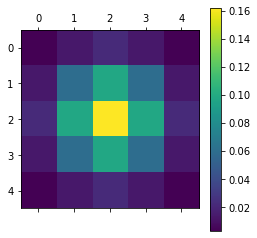

In [14]:
with np.printoptions(threshold=np.inf):
    print(a)
import numpy as np
import matplotlib.pyplot as plt

plt.matshow(a);
plt.colorbar()
plt.show()

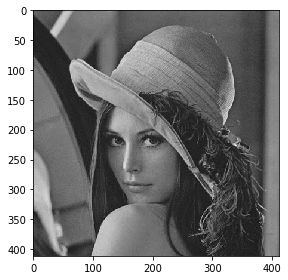

In [4]:
import cv2
import skimage as sk
from skimage import data, io, filters
import warnings
from IPython.display import Image
warnings.filterwarnings("ignore")
img = cv2.imread('lena.jpg',0)
# img=sk.io.imread('lena.jpg')
sk.io.imshow(img)

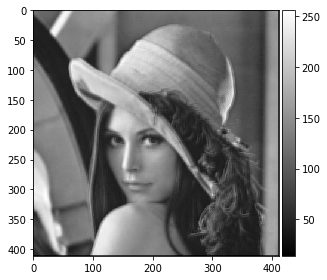

In [5]:
L=img.shape
x=L[0]
y=L[1]
smoth=np.zeros(shape=(x,y))
for j in range(0,x):
    for i in range(0,y):
        for u in range(0,n):
            for v in range(0,n):
                d1=(int(n/2)-u)
                d2=(int(n/2)-v)
                if (d1+j)>=0 and (d2+i)>=0 and (d1+j)<x and (d2+i)<y:
                    smoth[j,i]=smoth[j,i]+a[d1,d2]*img[d1+j,d2+i]
maxi=np.amax(smoth)
for j in range(0,x):
    for i in range(0,y):
        smoth[j,i]=(smoth[j,i]/maxi)*256
sk.io.imshow(smoth, cmap="gray")

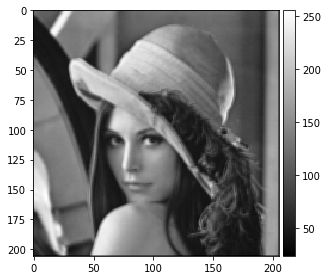

In [15]:
L=img.shape
#constante de escala
escala=2
#rescalada
x=int(L[0]/escala)
y=int(L[1]/escala)
escal=np.zeros(shape=(x,y))
unos=np.ones(shape=(escala,escala))
for j in range(0,x):  
    #indice de reescalamiento
    if j>0:
        j2=j*escala
    else:
        j2=j
    for i in range(0,y):
        #contador promedio
        q=0
        #contador que relaciona la matriz rescalada y la matrix suavizada
        if i>0:
            i2=i*escala
        else:
            i2=i
        for u in range(0,escala):
            for v in range(0,escala):
                if (u+j)<x and (v+i)<y:
                    escal[j,i]=escal[j,i]+unos[u,v]*smoth[u+j2,v+i2]
                    q=q+1
        if q>0:
            escal[j,i]=escal[j,i]/q    
maxi=np.amax(escal)
for j in range(0,x):
    for i in range(0,y):
        escal[j,i]=(escal[j,i]/maxi)*256
sk.io.imshow(escal, cmap="gray")

In [16]:
lista=[]
#diferentes escalas
for escala in range(2,8,2):
    #rescalada
    L=img.shape
    x=int(L[0]/escala)
    y=int(L[1]/escala)
    escal=np.zeros(shape=(x,y))
    unos=np.ones(shape=(escala,escala))
    for j in range(0,x):  
        #indice de reescalamiento
        if j>0:
            j2=j*escala
        else:
            j2=j
        for i in range(0,y):
            #contador promedio
            q=0
            #contador que relaciona la matriz rescalada y la matrix suavizada
            if i>0:
                i2=i*escala
            else:
                i2=i
            for u in range(0,escala):
                for v in range(0,escala):
                    if (u+j)<x and (v+i)<y:
                        escal[j,i]=escal[j,i]+unos[u,v]*smoth[u+j2,v+i2]
                        q=q+1
            if q>0:
                escal[j,i]=escal[j,i]/q    
    maxi=np.amax(escal)
    for j in range(0,x):
        for i in range(0,y):
            escal[j,i]=(escal[j,i]/maxi)*256
    lista.append(escal)

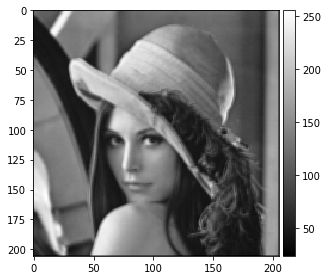

In [17]:
#escala 1/2
sk.io.imshow(lista[0], cmap="gray")

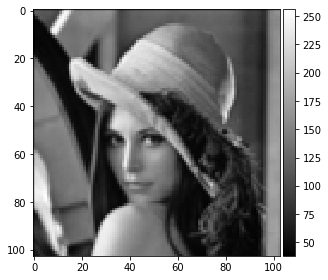

In [18]:
#escala 1/4
sk.io.imshow(lista[1], cmap="gray")

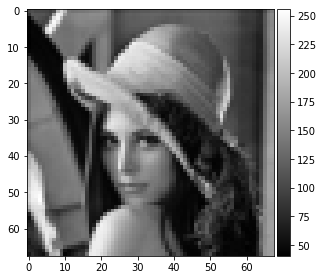

In [19]:
#escala 1/8
sk.io.imshow(lista[2], cmap="gray")